In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/DMG_data

/content/gdrive/MyDrive/DMG_data


# **Dataset Description**

ModCloth is an e-commerce website which sells women’s clothing
and accessories. One unique property of this data is that many
products include two human models with different body shapes (as
shown in Figure 1) and measurements of these models. In addition,
users can optionally provide the product sizes they purchased and
fit feedback (‘Just Right’, ‘Slightly Larger’, ‘Larger’, ‘Slightly Smaller’
or ‘Smaller’) along with their reviews. Therefore we focus on the
dimension of human body shape as the source of marketing bias in
this dataset.
Product Image Group (Body Shape). We start with the clothing
products included in an existing public dataset [23], re-scrape their
landing pages, collect related model size measurements and all
review ratings. We normalize their product sizes as ‘XS’, ‘S’, ‘M’,
‘L’, ‘XL’, ‘1X’, ‘2X’, ‘3X’ and ‘4X’ according to the provided size
charts.3 Products with only one human model wearing a relatively
small size (‘XS’, ‘S’, ‘M’ or ‘L’) are labeled as the ‘Small’ group while
products with two models (an additional model wearing a plus-size:
1X’, ‘2X’, ‘3X’ or ‘4X’) are referred as the ‘Small&Large’ group.
User Identity Group (Body Shape). We then calculate the average size each user purchased and classify users into ‘Small’ and
‘Large’ groups based on the same standard as the product body
shape image.
We observe that all products offer the complete spectrum of sizes,
while 70% of these products are interacted with by at least one user
from the ‘Large’ group and 97% are interacted with by the ‘Small’
group. Thus we conclude that most users are able to consume most
products at some point within the time frame of our dataset.
Ultimately we collect nearly 100K reviews about 1,020 clothing
products from 44,783 users, where around 90% of users can be
matched to the above identity groups

In [27]:
import pandas as pd

# Load your CSV data into a pandas DataFrame
data = pd.read_csv('df_modcloth.csv')

# Check Data Sparsity
# Calculate the number of unique users and unique items
num_users = data['user_id'].nunique()
num_items = data['item_id'].nunique()

# Calculate the number of ratings in the dataset
num_ratings = len(data)

# Calculate sparsity as the ratio of ratings to the total number of possible ratings
sparsity = 1 - (num_ratings / (num_users * num_items))

print(f"Number of Users: {num_users}")
print(f"Number of Items: {num_items}")
print(f"Number of Ratings: {num_ratings}")
print(f"Sparsity: {sparsity:.4f}")

Number of Users: 44783
Number of Items: 1020
Number of Ratings: 99893
Sparsity: 0.9978


In [28]:
uniq_size = data['size'].unique()
uniq_fit = data['fit'].unique()
uniq_category = data['category'].unique()
uniq_brand = data['brand'].unique()
uniq_user_att = data['user_attr'].unique()
uniq_model_att = data['model_attr'].unique()
uniq_split = data['split'].unique()
uniq_rating = data['rating'].unique()

print('size \n', uniq_size, '\n')
print('fit \n', uniq_fit, '\n')
print('category \n', uniq_category, '\n')
print('brand \n', uniq_brand, '\n')
print('user attr \n', uniq_user_att, '\n')
print('model attr \n', uniq_model_att, '\n')
print('split \n', uniq_split, '\n')
print('rating \n', uniq_rating, '\n')

split_value_counts = data['split'].value_counts()

# Print the result (optional)
print(split_value_counts)

size 
 [nan  1.  2.  3.  7.  4.  6.  5.  8.  0.] 

fit 
 [nan 'Just right' 'Slightly small' 'Very small' 'Slightly large'
 'Very large'] 

category 
 ['Dresses' 'Outerwear' 'Bottoms' 'Tops'] 

brand 
 [nan 'ModCloth' 'Retrolicious' 'Steve Madden' 'Ryu' 'Chi Chi London'
 'Out of Print' 'Kin Ship' 'Jack by BB Dakota' 'Pink Martini'
 'Miss Candyfloss' 'Emily and Fin' 'Daisey Natives' 'Hell Bunny' 'Banned'
 'Sugarhill Boutique' 'Wrangler' 'Wendy Bird' 'Pepaloves' 'Collectif'
 'Compania Fantastica' 'Closet London' 'Eliza J' 'BB Dakota' "Alice's Pig"
 'Louche' "Effie's Heart" 'Miss Patina' 'Mata Traders' "Rolla's" 'Yumi'
 'Blue Platypus'] 

user attr 
 ['Small' nan 'Large'] 

model attr 
 ['Small' 'Small&Large'] 

split 
 [0 2 1] 

rating 
 [4 3 5 2 1] 

0    78551
2    14476
1     6866
Name: split, dtype: int64


In [29]:
# Group the data by 'item_id' and count the number of ratings for each item
item_ratings_count = data.groupby('item_id')['rating'].count().reset_index()

# Rename the columns for clarity
item_ratings_count.columns = ['item_id', 'ratings_count']

# Display the number of ratings for each item
print(item_ratings_count)

print("_____________________________-")

# Calculate the mean of ratings counts
mean_ratings_count = item_ratings_count['ratings_count'].mean()

# Calculate the median of ratings counts
median_ratings_count = item_ratings_count['ratings_count'].median()

# Calculate the mode of ratings counts
mode_ratings_count = item_ratings_count['ratings_count'].mode().values[0]  # In case of multiple modes, take the first one
std_deviation_rating_count = item_ratings_count['ratings_count'].std()
# Calculate the maximum and minimum ratings counts
max_ratings_count = item_ratings_count['ratings_count'].max()
min_ratings_count = item_ratings_count['ratings_count'].min()

# Display the calculated statistics
print(f"Mean: {mean_ratings_count:.2f}")
print(f"Median: {median_ratings_count}")
print(f"Mode: {mode_ratings_count}")
print(f"Standard Deviation: {std_deviation_rating_count}")
print(f"Maximum: {max_ratings_count}")
print(f"Minimum: {min_ratings_count}")

      item_id  ratings_count
0        6454             66
1        7443           1011
2       11960            854
3       16411           1260
4       21296           1636
...       ...            ...
1015   155308             10
1016   155317             66
1017   155537             11
1018   155597              7
1019   155950             14

[1020 rows x 2 columns]
_____________________________-
Mean: 97.93
Median: 17.0
Mode: 4
Standard Deviation: 216.4166115474949
Maximum: 1887
Minimum: 1


In [30]:
# Assuming you have the original DataFrame 'data' and 'item_ratings_count_df'
# Merge the two DataFrames on 'item_id' to get the ratings count for each item in 'original_df'
merged_df = data.merge(item_ratings_count, on='item_id', how='left')

# Filter the rows where 'ratings_count' is greater than 1 or where 'ratings_count' is NaN
filtered_df = merged_df[(merged_df['ratings_count'] > 1) | (merged_df['ratings_count'].isna())]

# The filtered_df will contain the rows with items that have more than one rating or items with missing ratings count.

# # You can drop the 'ratings_count' column if it's no longer needed
# filtered_df.drop(columns=['ratings_count'], inplace=True)

# The filtered_df DataFrame now contains the rows you want to keep.
max_ratings_count = filtered_df['ratings_count'].max()
min_ratings_count = filtered_df['ratings_count'].min()
print(f"Maximum: {max_ratings_count}")
print(f"Minimum: {min_ratings_count}")
print(filtered_df.head(5))

Maximum: 1887
Minimum: 2
   item_id       user_id  rating                  timestamp  size  fit  \
0     7443          Alex       4  2010-01-21 08:00:00+00:00   NaN  NaN   
1     7443  carolyn.agan       3  2010-01-27 08:00:00+00:00   NaN  NaN   
2     7443         Robyn       4  2010-01-29 08:00:00+00:00   NaN  NaN   
3     7443            De       4  2010-02-13 08:00:00+00:00   NaN  NaN   
4     7443         tasha       4  2010-02-18 08:00:00+00:00   NaN  NaN   

  user_attr model_attr category brand  year  split  ratings_count  
0     Small      Small  Dresses   NaN  2012      0           1011  
1       NaN      Small  Dresses   NaN  2012      0           1011  
2     Small      Small  Dresses   NaN  2012      0           1011  
3       NaN      Small  Dresses   NaN  2012      0           1011  
4     Small      Small  Dresses   NaN  2012      0           1011  


NOTE: Number of user ratings for individual items is very skewed, data is sparse, item-item similarity will work better. This can also be observed through the below scatter plots.

# **VISUALIZATION**

Item vs No. of ratings

In [31]:
import matplotlib.pyplot as plt


# Extract the columns for the scatter plot
item_ids = item_ratings_count["item_id"]
ratings_count = item_ratings_count["ratings_count"]

print("_____________________________-")

# Calculate the mean of ratings counts
mean_ratings_count = item_ratings_count['ratings_count'].mean()

# Calculate the median of ratings counts
median_ratings_count = item_ratings_count['ratings_count'].median()

# Calculate the mode of ratings counts
mode_ratings_count = item_ratings_count['ratings_count'].mode().values[0]  # In case of multiple modes, take the first one
std_deviation_rating_count = item_ratings_count['ratings_count'].std()
# Calculate the maximum and minimum ratings counts
max_ratings_count = item_ratings_count['ratings_count'].max()
min_ratings_count = item_ratings_count['ratings_count'].min()

# Display the calculated statistics
print(f"Mean: {mean_ratings_count:.2f}")
print(f"Median: {median_ratings_count}")
print(f"Mode: {mode_ratings_count}")
print(f"Standard Deviation: {std_deviation_rating_count}")
print(f"Maximum: {max_ratings_count}")
print(f"Minimum: {min_ratings_count}")


_____________________________-
Mean: 97.93
Median: 17.0
Mode: 4
Standard Deviation: 216.4166115474949
Maximum: 1887
Minimum: 1


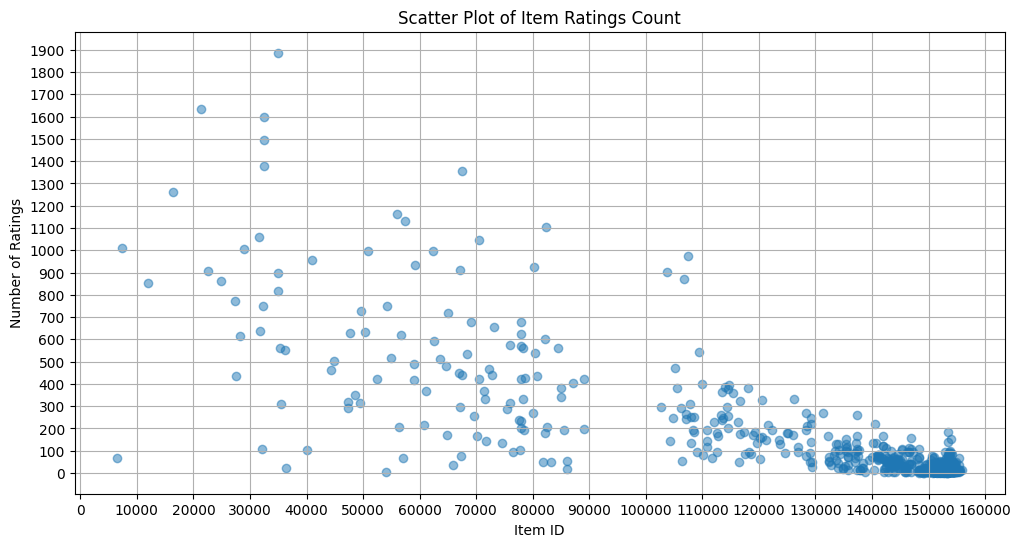

In [32]:
plt.figure(figsize=(12, 6))

# Create a scatter plot
plt.scatter(item_ids, ratings_count, alpha=0.5)
plt.xlabel("Item ID")
plt.ylabel("Number of Ratings")
plt.title("Scatter Plot of Item Ratings Count")
plt.grid(True)  # Add grid lines (optional)

# Customize the axis ticks (optional)
plt.xticks(range(0, 170000, 10000))  # Adjust the range and interval as needed
plt.yticks(range(0, max(ratings_count) + 100, 100))  # Adjust the range and interval as needed

plt.show()

# User vs No. of ratings

In [34]:
# Group the data by 'item_id' and count the number of ratings for each item
user_ratings_count = data.groupby('user_id')['rating'].count().reset_index()

# Rename the columns for clarity
user_ratings_count.columns = ['user_id', 'ratings_count']

user_ratings_count['user_number'] = range(1, len(user_ratings_count) + 1)
print(user_ratings_count)
print("_____________________________-")

# Calculate the mean of ratings counts
mean_ratings_count = user_ratings_count['ratings_count'].mean()

# Calculate the median of ratings counts
median_ratings_count = user_ratings_count['ratings_count'].median()

# Calculate the mode of ratings counts
mode_ratings_count = user_ratings_count['ratings_count'].mode().values[0]  # In case of multiple modes, take the first one
std_deviation_rating_count = user_ratings_count['ratings_count'].std()
# Calculate the maximum and minimum ratings counts
max_ratings_count = user_ratings_count['ratings_count'].max()
min_ratings_count = user_ratings_count['ratings_count'].min()

# Display the calculated statistics
print(f"Mean: {mean_ratings_count:.2f}")
print(f"Median: {median_ratings_count}")
print(f"Mode: {mode_ratings_count}")
print(f"Standard Deviation: {std_deviation_rating_count}")
print(f"Maximum: {max_ratings_count}")
print(f"Minimum: {min_ratings_count}")

           user_id  ratings_count  user_number
0       "Ferrari")              2            1
1                #              1            2
2            #1dad              1            3
3          'Chelle              2            4
4           'Tree'              2            5
...            ...            ...          ...
44778  zurajohnson              4        44779
44779    zuzu_zoom              1        44780
44780           🇦🇺              2        44781
44781            🐻              1        44782
44782            😊              1        44783

[44783 rows x 3 columns]
_____________________________-
Mean: 2.23
Median: 1.0
Mode: 1
Standard Deviation: 6.548969124930111
Maximum: 250
Minimum: 1


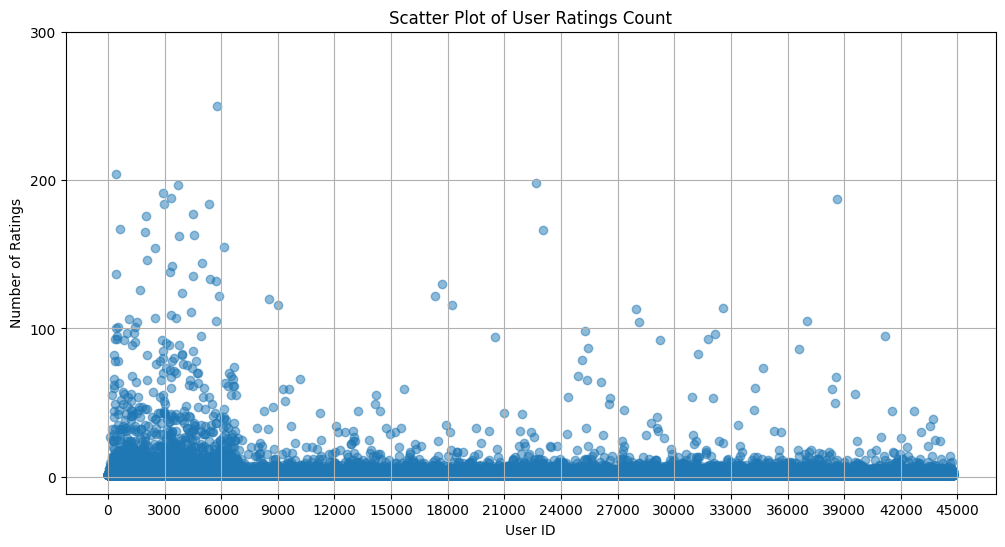

In [35]:
# Extract the columns for the scatter plot
user_ids = user_ratings_count["user_number"]
ratings_count = user_ratings_count["ratings_count"]

plt.figure(figsize=(12, 6))

# Create a scatter plot
plt.scatter(user_ids, ratings_count, alpha=0.5)
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.title("Scatter Plot of User Ratings Count")
plt.grid(True)  # Add grid lines (optional)

# Customize the axis ticks (optional)
plt.xticks(range(0, 48000, 3000))  # Adjust the range and interval as needed
plt.yticks(range(0, max(ratings_count) + 100, 100))  # Adjust the range and interval as needed

plt.show()

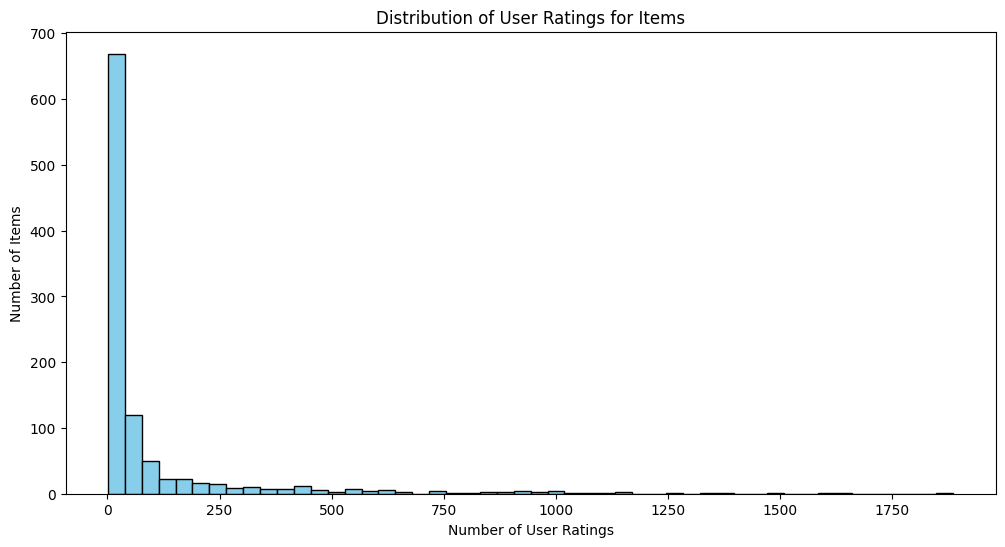

In [49]:
item_ratings_count = data.groupby('item_id')['user_id'].count()

plt.figure(figsize=(12, 6))
plt.hist(item_ratings_count, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ratings for Items')
plt.xlabel('Number of User Ratings')
plt.ylabel('Number of Items')
# plt.yscale('log')

plt.show()

# **Splitting**

# Data Preprocessing
Dropping rows with NAN user_id

Dropping columns with NAN Values: size, fit, user_attr, brand. And

In [36]:
# Assuming you have a DataFrame named 'original_df' - > filtered_df
# Find columns with NaN or empty cells
columns_with_missing_data = filtered_df.columns[filtered_df.isna().any()].tolist()

# Print or display the list of columns with missing data
print(columns_with_missing_data)

column_name = 'user_id'

# Use isna() followed by sum() to count NaN values in the specified column
nan_count = filtered_df[column_name].isna().sum()

# Print or display the number of NaN values
print(f"Number of NaN values in '{column_name}': {nan_count}")

# Use the dropna() method to remove rows with NaN values in the 'user_id' column
filtered_df.dropna(subset=['user_id'], inplace=True)
nan_count = filtered_df[column_name].isna().sum()
print(f"Number of NaN values in '{column_name}': {nan_count}")

['user_id', 'size', 'fit', 'user_attr', 'brand']
Number of NaN values in 'user_id': 1
Number of NaN values in 'user_id': 0


<ipython-input-36-b8ba579bb232>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['user_id'], inplace=True)


In [37]:
columns_to_drop = ['size', 'fit', 'user_attr', 'brand']

# Use the drop() method to remove the specified columns
filtered_df.drop(columns=columns_to_drop, inplace=True)

filtered_df.head(5)

columns_to_drop = ['timestamp', 'year']
filtered_df.drop(columns=columns_to_drop, inplace=True)
filtered_df.head(5)

<ipython-input-37-199d95228bc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=columns_to_drop, inplace=True)
<ipython-input-37-199d95228bc4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=columns_to_drop, inplace=True)


,item_id,user_id,rating,model_attr,category,split,ratings_count
0,7443,Alex,4,Small,Dresses,0,1011
1,7443,carolyn.agan,3,Small,Dresses,0,1011
2,7443,Robyn,4,Small,Dresses,0,1011
3,7443,De,4,Small,Dresses,0,1011
4,7443,tasha,4,Small,Dresses,0,1011


find items that have only one user rating

In [38]:
from sklearn.model_selection import train_test_split

# Split the DataFrame based on the 'split' column
# 0 - train, 1 - val, 2 - test
split_train_df = filtered_df[(filtered_df['split'] == 0) | (filtered_df['split'] == 1)]
split_test_df = filtered_df[filtered_df['split'] == 2]

# Optionally, reset the index of the new DataFrames if needed
split_train_df.reset_index(drop=True, inplace=True)
split_test_df.reset_index(drop=True, inplace=True)

# Split the DataFrame randomly into training (85%) and testing (15%) sets
random_train_df, random_test_df = train_test_split(filtered_df, test_size=0.15, random_state=42)

# # drop the split column
# drop_col = ['split']

# split_train_df.drop(columns=drop_col, inplace=True)
# split_test_df.drop(columns=drop_col, inplace=True)

# random_train_df.drop(columns=drop_col, inplace=True)
# random_test_df.drop(columns=drop_col, inplace=True)

print('split train ', split_train_df.shape)
print('split test ', split_test_df.shape)
print('random train ', random_train_df.shape)
print('random test ', random_test_df.shape)

split train  (85406, 7)
split test  (14475, 7)
random train  (84898, 7)
random test  (14983, 7)


In [ ]:
# Use the to_csv() method to save the DataFrame as a CSV file
split_train_df.to_csv('split_train', index=False)
split_test_df.to_csv('split_test', index=False)

random_train_df.to_csv('random_train', index=False)
random_test_df.to_csv('random_test', index=False)

# Perform CF on DATA

In [3]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('split_train.csv')
df_test = pd.read_csv('split_test.csv')

In [4]:
from sklearn import preprocessing
def preprocsses2(df):
    le = preprocessing.LabelEncoder()
    df['user_name'] = df['user_id']
    df['user_id'] = le.fit_transform(df['user_id'])
    movie_stats = df.groupby('item_id')[['rating']].agg(['mean'])
    movie_stats.columns = movie_stats.columns.droplevel()
    df = df.merge(movie_stats, left_on='item_id', right_index=True, how='left')
    df.rename(columns={'mean': 'mean_rating_item'}, inplace=True)
    df['rating_centered'] = df['rating'] - df['mean_rating_item']

    user_stats = df.groupby('user_id')[['rating']].agg(['mean'])
    user_stats.columns = user_stats.columns.droplevel()
    df = df.merge(user_stats, left_on='user_id', right_index=True, how='left')
    df.rename(columns={'mean': 'mean_rating_user'}, inplace=True)
    return df

df_train = preprocsses2(df_train)
df_test = preprocsses2(df_test)

In [5]:
df_train.head()

,item_id,user_id,rating,model_attr,category,user_name,mean_rating_item,rating_centered,mean_rating_user
0,7443,309,4,Small,Dresses,Alex,3.800427,0.199573,4.123077
1,7443,13009,3,Small,Dresses,carolyn.agan,3.800427,-0.800427,3.000000
2,7443,5534,4,Small,Dresses,Robyn,3.800427,0.199573,4.310345
3,7443,1716,4,Small,Dresses,De,3.800427,0.199573,4.000000
4,7443,42071,4,Small,Dresses,tasha,3.800427,0.199573,3.545455


In [39]:
# @title Item-item CF
def calculate_rmse(true_rating, pred_rating):
  # squared differences between actual and predicted ratings
  squared_errors = [((actual - predicted)/7) ** 2 for actual, predicted in zip(true_rating, pred_rating)]
  # mean of squared errors
  mse = sum(squared_errors) / len(squared_errors)
  rmse = math.sqrt(mse)
  return rmse

def calculate_mae(true_rating, pred_rating):
  abs_error = [(abs(actual - predicted)/8) for actual, predicted in zip(true_rating, pred_rating)]
  mae = sum(abs_error)/len(abs_error)
  return mae

In [40]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
import math
from sklearn.metrics import mean_absolute_error

def create_matrix(df, column_name):

    N = len(df['user_id'].unique())
    M = len(df['item_id'].unique())

    # Map Ids to indices
    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(N))))
    item_mapper = dict(zip(np.unique(df["item_id"]), list(range(M))))

    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["user_id"])))
    item_inv_mapper = dict(zip(list(range(M)), np.unique(df["item_id"])))

    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [item_mapper[i] for i in df['item_id']]

    X = csr_matrix((df[column_name], (item_index, user_index)), shape=(M, N))

    return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

def find_similar_movies(item_id, X, k, metric, flag, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper):
    neighbour_ids = []
    neighbour_distances = []
    # X = X.toarray()
    item_ind = item_mapper[item_id]
    item_vec = X[item_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, metric=metric)
    if flag:
        X = X.reshape(1,-1)
    kNN.fit(X)
    # print(movie_vec.shape[1])
    # movie_vec = movie_vec.reshape(movie_vec.shape[1],1)
    # print(movie_vec.shape)
    item_vec = item_vec.reshape(1,-1)
    distances, neighbours = kNN.kneighbors(item_vec, return_distance=True)
    # print(distances)
    for i in range(0,k):
        # print(neighbour[i])
        n = neighbours[0][i]
        # print(n)
        d = distances[0][i]
        neighbour_distances.append(d)
        neighbour_ids.append(item_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids, neighbour_distances

def baseline(x,i,u,df):
    bx = df[df['user_id'] == x]['mean_rating_user'].values[0] - u
    bi = df[df['item_id'] == i]['mean_rating_item'].values[0] - u
    return u + bx + bi

def calculate_rmse2(true_rating, pred_rating):
  # squared differences between actual and predicted ratings
  squared_errors = [((actual - predicted)) ** 2 for actual, predicted in zip(true_rating, pred_rating)]
  # mean of squared errors
  mse = sum(squared_errors) / len(squared_errors)
  rmse = math.sqrt(mse)
  return rmse

def calculate_mae2(true_rating, pred_rating):
  abs_error = [(abs(actual - predicted)) for actual, predicted in zip(true_rating, pred_rating)]
  mae = sum(abs_error)/len(abs_error)
  return mae

def prediction_individual(item_id, user_id, X, k, flag, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper, df):
    mean_overall = df["rating"].mean()
    bxi = baseline(user_id, item_id, mean_overall, df)
    sum_nominator = 0
    sum_denominator = 0
    similar_ids, distances = find_similar_movies(item_id, X, k, 'cosine', flag, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper)
    # print(similar_ids)
    for i in range(0,len(similar_ids)):
        bxj = baseline(user_id, similar_ids[i], mean_overall, df)
        sxj = distances[i]
        rxj = 0
        d = 0
        try:
            rxj = X[item_mapper[similar_ids[i]], user_mapper[user_id]]
            d = rxj - bxj
        except KeyError:
            rxj = 0
            d = mean_overall
        # rxj = X[item_mapper[similar_ids[i]], user_mapper[user_id]]
        sum_nominator += sxj * d
        sum_denominator += sxj
    # print(sum_nominator)
    # print(sum_denominator)
    return sum_nominator/sum_denominator

def prediction(df_test, utility_matrix, kNN, flag, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper, df):
    pred_values = []
    true_values = []
    for index, row in df_test.iterrows():
        pred = 0
        try:
            column_index = user_mapper[row['user_id']]
            row_index = item_mapper[row['item_id']]
        except KeyError:
            print('no')
            pred_values.append(df["rating"].mean())
            true_values.append(row['rating'])
            continue
        if flag:
            column_index = user_mapper[row['user_id']]
            utility_matrix_ = utility_matrix.toarray()
            utility_matrix = utility_matrix_[:, column_index]
            # print(utility_matrix.shape)
            # utility_matrix = utility_matrix.reshape(utility_matrix.shape[1], 1)
        # print('yes')
        # print(utility_matrix.shape)
        pred = prediction_individual(row['item_id'], row['user_id'], utility_matrix, k_no, flag, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper, df)
        pred_values.append(pred)
        true_values.append(row['rating'])
    return pred_values, true_values


In [43]:
# @title K-fold Cross validation


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kf = KFold(n_splits=5)
kf.get_n_splits(df_train)
print(df_train.shape)
rmse_errors = []
for i, (train_index, val_index) in enumerate(kf.split(df_train)):
    print(f"Fold {i}:")
    k_no = 5
    df_train2 , df_val = df_train.iloc[train_index,:], df_train.iloc[val_index,:]
    # print(df_train.shape)
    #train/fit
    utility_matrix, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_train, 'rating_centered')
    # print(utility_matrix.shape)
    #predict
    pred_values, true_values = prediction(df_val, utility_matrix, k_no, False, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper, df_train)
    rmse = calculate_rmse(true_values, pred_values)
    rmse_errors.append(rmse)
    print('RMSE', rmse)
    #rmse on validation set

print('Mean RMSE', sum(rmse_errors) / len(rmse_errors))

(85416, 9)
Fold 0:
RMSE 1.2268427820716816
Fold 1:
RMSE 1.2119851907275256
Fold 2:
RMSE 1.210863465852417
Fold 3:
RMSE 1.2062653053982821
Fold 4:
RMSE 1.2117064604506345
Mean RMSE 1.2135326409001082


In [ ]:
# @title Testing


In [42]:
utility_matrix, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_train, 'rating_centered')
pred_values, true_values = prediction(df_test, utility_matrix, k_no, False, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper, df_train)
rmse = calculate_rmse(true_values, pred_values)
print('RMSE Test Set', rmse)

no
RMSE Test Set 1.2017464266278848


In [5]:
df = pd.read_csv('df_modcloth.csv')

In [6]:
df.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           99893 non-null  int64  
 1   user_id           99893 non-null  int64  
 2   rating            99893 non-null  int64  
 3   timestamp         99893 non-null  object 
 4   size              78133 non-null  float64
 5   fit               81387 non-null  object 
 6   user_attr         91526 non-null  object 
 7   model_attr        99893 non-null  object 
 8   category          99893 non-null  object 
 9   brand             25913 non-null  object 
 10  year              99893 non-null  int64  
 11  split             99893 non-null  int64  
 12  user_name         99892 non-null  object 
 13  mean_rating_item  99893 non-null  float64
 14  rating_centered   99893 non-null  float64
 15  mean_rating_user  99893 non-null  float64
dtypes: float64(4), int64(5), object(7)
memor

In [7]:
n_ratings = len(df)
n_movies = len(df['item_id'].unique())
n_users = len(df['user_id'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")

Number of ratings: 99893
Number of unique movieId's: 1020
Number of unique users: 44784
